In [1]:
import h5py
import sys
import numpy as np
from scipy import io
from math import *;

import matplotlib.pyplot as plt
from matplotlib import image

sys.path.append('C:\\Users\\vchaplin\\Documents\\HiFU\\code\\myPy')  
sys.path.append('C:\\Users\\vchaplin\\Documents\\HiFU\\code\\AblationSims')
sys.path.append('C:\\Users\\Vandiver\\Documents\\HiFU\\code\\BioHeatCpp\\PBHEswig\\x64')

In [18]:
file="/Users/vchaplin/Data/Verasonics/PSF_simulation/runs0609/simulation_x400_y360.mat"
matdict=io.loadmat(file,squeeze_me=True,struct_as_record=False)

In [4]:
matdict.keys()

dict_keys(['decayconst', 'sensor', 'd', 'Ny', 'medium', '__header__', 'filename', 'vv', 'sourceloc', 'source', 'dt', 'numSources', 'dir', 'Nx', 'input_args', '__function_workspace__', 'ii', 'lastEll', 'sensor_data', '__globals__', '__version__', 'sensidx', 'elementnum', 'firstEll', 'pitch', 'None', 'freq'])

In [19]:
pr_data=matdict['sensor_data'].p
p_final=matdict['sensor_data'].p_final

Nchan=pr_data.shape[0]
Nt=pr_data.shape[1]
dt=matdict['dt']
times = np.arange(0, Nt*dt,dt)

d = matdict['d']

pitch=matdict['pitch']*matdict['d']

c0 = np.mean(matdict['medium'].sound_speed)

In [136]:
matdict['sourceloc']*d

array([ 0.00745,  0.00745])

In [20]:
#target image space
ducer_width = pitch*Nchan

dx = 1e-4
dz = 1e-4
Nx = round(ducer_width/dx)
Nz = round(6.0e-2 /dz )

xpnts = np.linspace(-0.5,0.5,Nx)*Nx*dx
zpnts = np.linspace(0,1,Nz)*Nz*dz

ux = (np.linspace(-0.5,0.5,Nchan)*Nchan + 0.5)*pitch

In [21]:
#image and resampling grids
ndZ,ndX,ndux = np.meshgrid(zpnts,xpnts,ux, indexing='ij')

distances = np.sqrt( (ndX-ndux)**2 + ndZ**2 )
delayinds = np.round( distances / (c0*dt)).astype(int)
inbounds3 = (delayinds <= Nt)
ii=np.nonzero(inbounds3)

In [178]:
len(delayinds[inbounds3]) - len(ii[2])

0

In [22]:
delayed=np.zeros([Nz,Nx,Nchan])
delayed[ii[0],ii[1],ii[2]] = pr_data[ii[2], delayinds[inbounds3]]
img=np.sum(delayed*distances,axis=2)

In [109]:
delayinds.shape

(70, 381, 128)

In [56]:
pr_data.shape

(128, 601)

In [11]:
del matdict

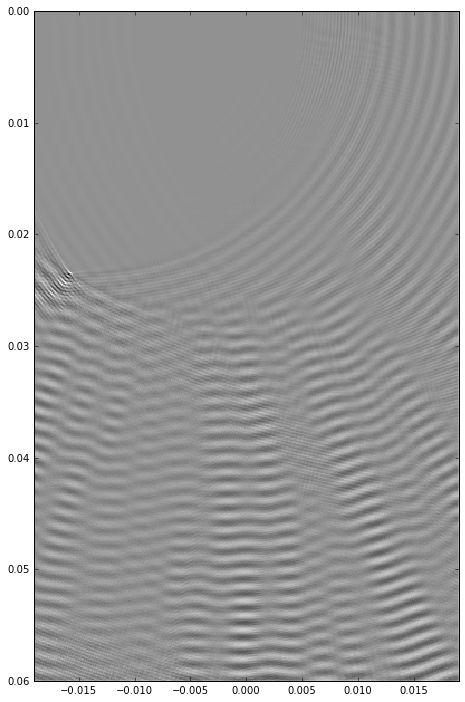

In [17]:
plt.figure(figsize=(12,12))
ext=[xpnts[0],xpnts[-1],zpnts[-1],zpnts[0]]
plt.imshow( img, extent=ext, cmap=image.cm.gray,interpolation='None')

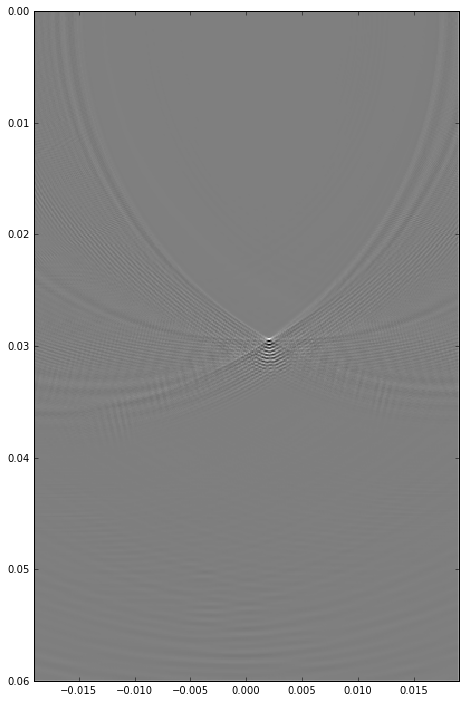

In [23]:
plt.figure(figsize=(12,12))
ext=[xpnts[0],xpnts[-1],zpnts[-1],zpnts[0]]
plt.imshow( img, extent=ext, cmap=image.cm.gray,interpolation='None')

In [40]:
times[-1]*c0

0.092399999999999996

In [123]:
Nz

70

In [124]:
Nz*dz

0.07

In [125]:
zpnts

array([  0.00000000e+00,   1.44927536e-05,   2.89855072e-05,
         4.34782609e-05,   5.79710145e-05,   7.24637681e-05,
         8.69565217e-05,   1.01449275e-04,   1.15942029e-04,
         1.30434783e-04,   1.44927536e-04,   1.59420290e-04,
         1.73913043e-04,   1.88405797e-04,   2.02898551e-04,
         2.17391304e-04,   2.31884058e-04,   2.46376812e-04,
         2.60869565e-04,   2.75362319e-04,   2.89855072e-04,
         3.04347826e-04,   3.18840580e-04,   3.33333333e-04,
         3.47826087e-04,   3.62318841e-04,   3.76811594e-04,
         3.91304348e-04,   4.05797101e-04,   4.20289855e-04,
         4.34782609e-04,   4.49275362e-04,   4.63768116e-04,
         4.78260870e-04,   4.92753623e-04,   5.07246377e-04,
         5.21739130e-04,   5.36231884e-04,   5.50724638e-04,
         5.65217391e-04,   5.79710145e-04,   5.94202899e-04,
         6.08695652e-04,   6.23188406e-04,   6.37681159e-04,
         6.52173913e-04,   6.66666667e-04,   6.81159420e-04,
         6.95652174e-04,